In [4]:
%matplotlib inline

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database with constraint  night < 1826.250000
Found 1238621 visits

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression ' night < 1826.250000' should be explicitly declared as text(' night < 1826.250000') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/yoachim/gitRepos/sims_maf_contrib/mafContrib/photPrecMetrics.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  stack_flux_err=1./np.sqrt((1/err_fluxes[ind]**2).sum())



Running:  [0, 1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

/Users/yoachim/gitRepos/sims_maf_contrib/mafContrib/photPrecMetrics.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  return np.std(dataSlice[self.colname])/np.median(dataSlice[self.colname])
Cannot plot object metric values with this plotter.
Cannot plot object metric values with this plotter.
Cannot plot object metric values with this plotter.
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth



Plotting figures with  night < 1826.250000 sqlconstraint now.
monopole: 0.130419  dipole: lon: 94.6568, lat: -41.8493, amp: 0.204295
monopole: 16.5195  dipole: lon: 91.4125, lat: -54.5833, amp: 2.29464
monopole: 7.35156  dipole: lon: 71.0307, lat: -9.9452, amp: 0.614497
monopole: 10.7305  dipole: lon: 53.3761, lat: 22.2659, amp: 0.868171
Plotting complete.

Optimal bin calculation tried to make inf bins, returning 200
/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression ' night < 1826.250000 and ...' should be explicitly declared as text(' night < 1826.250000 and ...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})



Querying database with constraint  night < 1826.250000 and finSeeing < 0.700000
Found 400554 visits
Running:  [0, 1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Cannot plot object metric values with this plotter.
Cannot plot object metric values with this plotter.
Cannot plot object metric values with this plotter.
Optimal bin calculation tried to make inf bins, returning 200



Plotting figures with  night < 1826.250000 and finSeeing < 0.700000 sqlconstraint now.
monopole: 0.00270415  dipole: lon: 37.4158, lat: -28.6009, amp: 0.008638
monopole: 9.34351  dipole: lon: 141.616, lat: -58.9922, amp: 2.41321
monopole: 4.64678  dipole: lon: 147.136, lat: -59.2532, amp: 0.520244
monopole: 7.24474  dipole: lon: 56.4869, lat: -24.9841, amp: 0.625531
Plotting complete.


/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


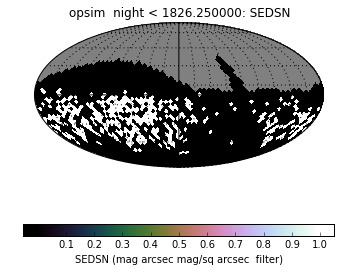

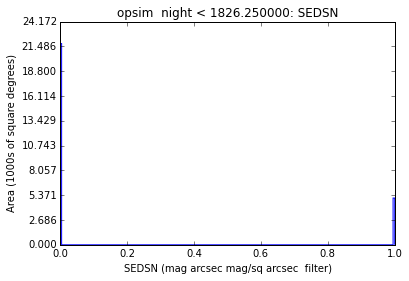

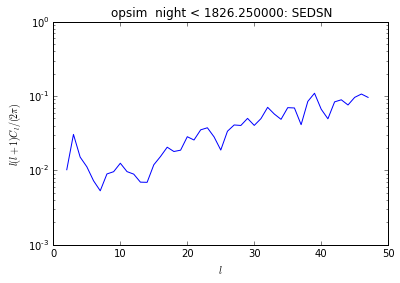

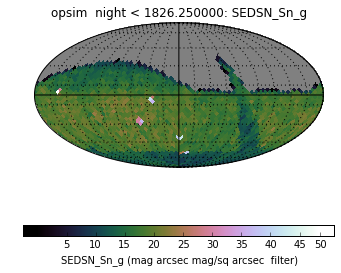

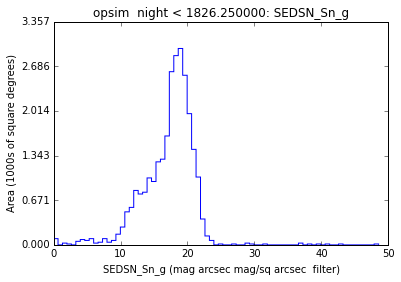

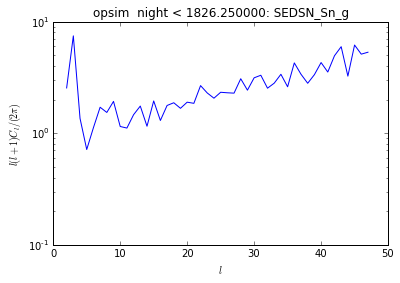

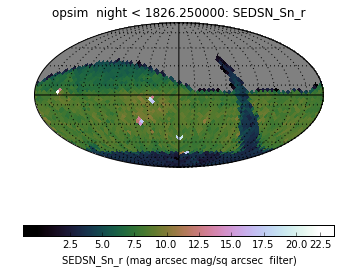

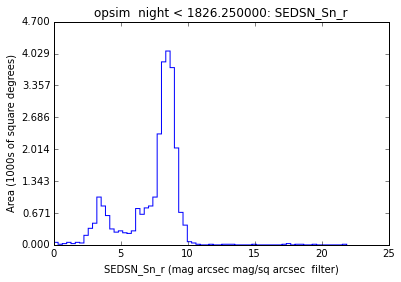

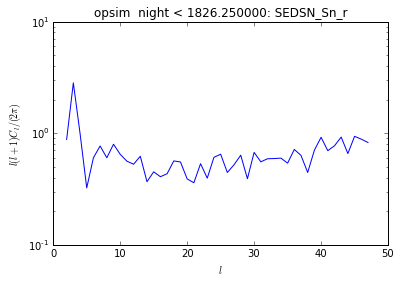

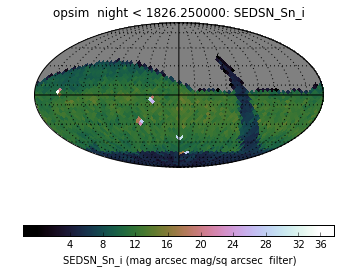

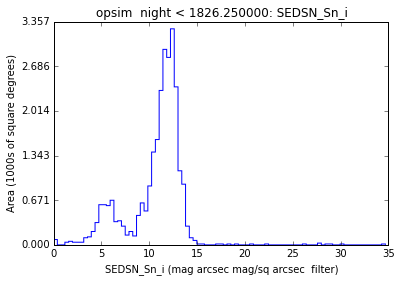

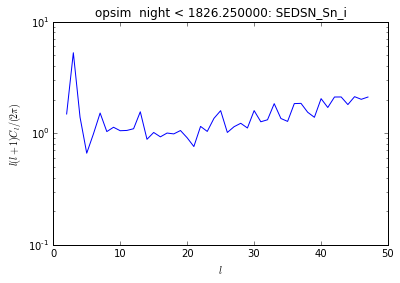

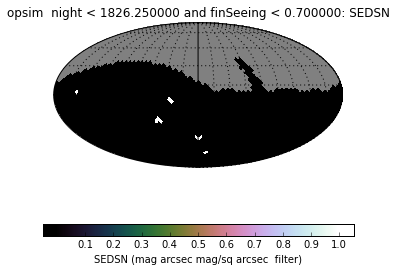

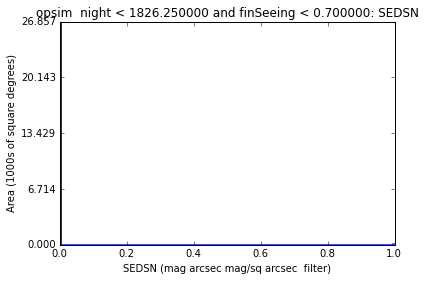

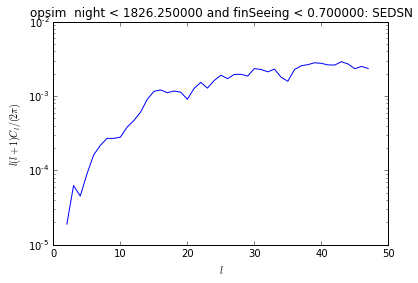

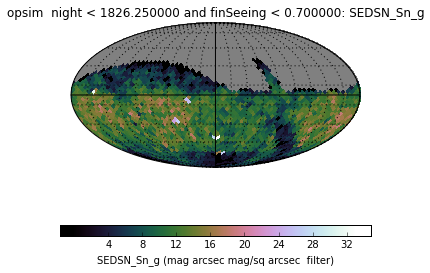

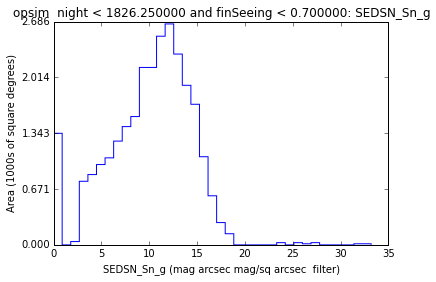

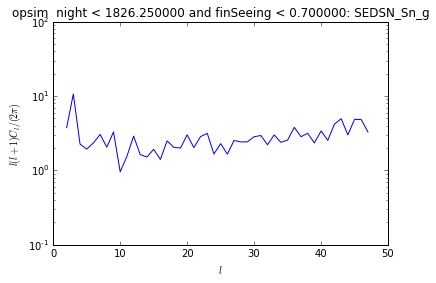

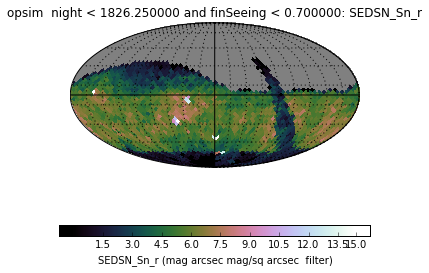

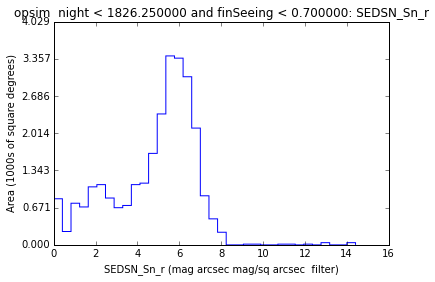

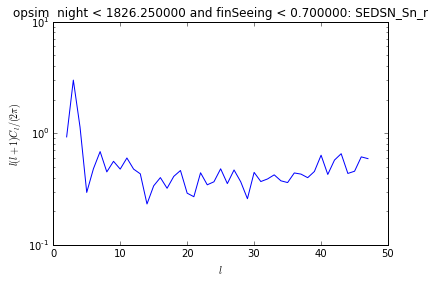

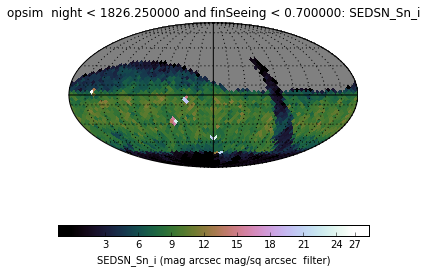

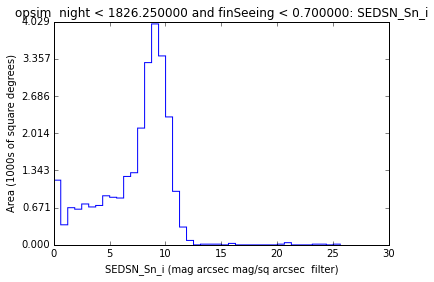

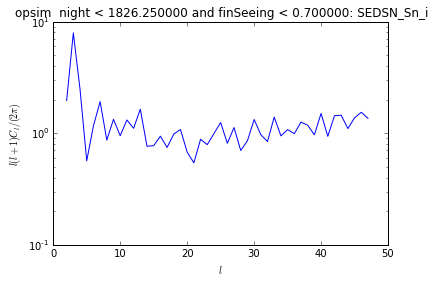

In [8]:
# This notebook assumes you are using sims_maf version >= 1.0, and have 'setup sims_maf' in your shell. 
# 

import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import numpy as np
import mafContrib
"""
Run the PhotPrecMetrics 
"""


goodSeeing = 0.7

sqls = [' night < %f' % ( 5.*365.25), ' night < %f and finSeeing < %f'% ( 5.*365.25, goodSeeing)]


# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'goodseeing_test'
resultsDb = db.ResultsDb(outDir=outDir)


slicer = slicers.HealpixSlicer(nside=16, lonCol='ditheredRA', latCol='ditheredDec')
summaryMetrics = [metrics.MeanMetric(), metrics.MedianMetric(), mafContrib.RelRmsMetric()]

bgroupList = []
names = ['All Visits', 'Good Seeing']

for name,sql in zip(names, sqls):
    bundles = {}
    cnt=0
    sed = { 'g':25, 'r': 26, 'i': 25}
    metric1 = mafContrib.SEDSNMetric(metricName='SEDSN', mags=sed)
    metric2 = mafContrib.ThreshSEDSNMetric(metricName='SEDSN', mags=sed)

    bundle1 = metricBundles.MetricBundle(metric1, slicer, sql, summaryMetrics=summaryMetrics)
    bundle2 = metricBundles.MetricBundle(metric2, slicer, sql, summaryMetrics=summaryMetrics)

    bundles={0:bundle1,1:bundle2}

    bgroup = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroupList.append(bgroup)


for bgroup in bgroupList:
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

if False:
    print 'name, mean PhotPrec, median PhotPrec '
    for bundleGroup in bgroupList:
        for i in range(6):
            print 'Filter %d'%i
            print bundleGroup.bundleDict[i].metric.name, \
                bundleGroup.bundleDict[i].summaryValues['Mean'], \
                bundleGroup.bundleDict[i].summaryValues['Median'],\
                bundleGroup.bundleDict[i].summaryValues['RelRms']